In [111]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [112]:
# Define data filepath
pathname = './lab2dropbox/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [113]:
#human caused fires only
df_human= df[df['NWCG_CAUSE'] == 'Human']
#over 50 acres
df_human_size= df_human[df_human['FIRE_SIZE']>50]
#df_human_size.groupby(df_human_size['FIPS_NAME']).count()
df_human_size['FIPS_NAME'].describe()



count              627
unique              38
top       Wasco County
freq                71
Name: FIPS_NAME, dtype: object

In [114]:
#human caused fires only
df_natural= df[df['NWCG_CAUSE'] == 'Natural']
#over 100 acres
df_natural_100= df_natural[df_natural['FIRE_SIZE']>100]
#df_human_size.groupby(df_human_size['FIPS_NAME']).count()
#df_natural_100['DISCOVERY_DOY']
datetime = pd.to_datetime(df_natural_100['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')

#df_natural_100["Date"] = datetime
df_natural_100.loc[:,"Date"] = datetime

df_natural_100.head()
large_fire_count = df_natural_100.iloc[:,0].groupby(df_natural_100['Date'].dt.month).count()
large_fire_count

/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Date
4       2
5       6
6      98
7     410
8     549
9      93
10      6
Name: OBJECTID, dtype: int64

In [115]:
df_200 = df[df['FIRE_SIZE']>200]
df_bigbad = df_200[df_200['NWCG_CAUSE']=='Missing data/not specified/undetermined']
df_bigbad

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
190,1909461.0,400031242,FWS-2016FF01RMCN00KP9K,FED,FWS-FMIS,FWS,USWAMNR,McNary National Wildlife Refuge,USWAMNR,MCNARY NWR,...,660.0,E,45.956908,-119.040151,FWS,OR,Umatilla,41059,Umatilla County,POINT (-119.04015 45.95691)
9755,2118753.0,400389824,ICS209_2018_9151636,INTERAGCY,IA-ICS209,ST/C&L,USORSGIN,South Gilliam County Rural Fire Protection Dis...,ORSGIN,South Gilliam County Rural Fire Protection Dis...,...,23600.0,G,45.207830,-120.474000,COUNTY,OR,Gilliam County,41021,Gilliam County,POINT (-120.47400 45.20783)
9871,1359522.0,15001451,ICS209_2000_OR-PRD-844,INTERAGCY,IA-ICS209,BLM,USORPRD,Prineville District,ORPRD,Prineville District,...,500.0,E,44.816667,-120.666667,MISSING/NOT SPECIFIED,OR,None,None,None,POINT (-120.66667 44.81667)
11524,2118725.0,400389795,ICS209_2018_9132954,INTERAGCY,IA-ICS209,BIA,USORWSA,Warm Springs Agency,ORWSA,Warm Springs Agency,...,717.0,E,44.760000,-121.230000,BIA,OR,Jefferson County,41031,Jefferson County,POINT (-121.23000 44.76000)
13028,2118757.0,400389828,ICS209_2018_9219255,INTERAGCY,IA-ICS209,FS,USORWWF,Wallowa-Whitman National Forest,ORWWF,Wallowa-Whitman National Forest,...,800.0,E,44.876180,-117.004000,PRIVATE,OR,Baker County,41001,Baker County,POINT (-117.00400 44.87618)
41888,2043068.0,400233487,ICS209_2017_7389895,INTERAGCY,IA-ICS209,FS,USORRSF,Rogue River-Siskiyou National Forest,ORRSF,Rogue River-Siskiyou National Forest,...,310.0,E,42.980280,-122.281700,MISSING/NOT SPECIFIED,OR,Klamath County,41035,Klamath County,POINT (-122.28170 42.98028)
45288,1359521.0,15001450,ICS209_2000_OR-ORS-919,INTERAGCY,IA-ICS209,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORORS,Oregon Department of Forestry State Headquarters,...,800.0,E,44.133333,-120.266667,MISSING/NOT SPECIFIED,OR,None,None,None,POINT (-120.26667 44.13333)
51464,1577997.0,201508245,W-649063,FED,DOI-WFMI,BLM,USORLAD,Lakeview District,ORLAD,Lakeview District,...,241.0,D,43.155800,-120.637500,BLM,OR,Lake,41037,Lake County,POINT (-120.63750 43.15580)
56054,2118767.0,400389838,ICS209_2018_9212487,INTERAGCY,IA-ICS209,ST/C&L,USOR723S,Gold Beach Unit,OR723S,Gold Beach Unit,...,397.0,E,42.590000,-124.250000,STATE,OR,Curry County,41015,Curry County,POINT (-124.25000 42.59000)
60018,1359053.0,15000709,ICS209_2009_OR-711S-110-10,INTERAGCY,IA-ICS209,ST/C&L,USOR711S,Medford Unit,OR711S,Medford Unit,...,633.0,E,42.346944,-122.811944,MISSING/NOT SPECIFIED,OR,Jackson,41029,Jackson County,POINT (-122.81194 42.34694)


In [116]:
biggest = df['FIRE_SIZE'].max()
biggest

df_biggest = df[df["FIRE_SIZE"]==biggest]
df_biggest["MTBS_FIRE_"]
#long draw
df_biggest["DISCOVERY_"]
#2012/07/08
df_biggest["COUNTY"]
#malheur

66964    Malheur
Name: COUNTY, dtype: object

In [117]:
df_lane = df[df["COUNTY"]== "Lane"]
df_lane_50 = df_lane[df_lane["FIRE_SIZE"]>200]
df_lane_50

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
33226,232117.0,236250,W-92733,FED,DOI-WFMI,BLM,USORNOD,Northwest Oregon District,OREUD,Eugene District,...,243.0,D,44.008700,-123.660400,BLM,OR,Lane,41039,Lane County,POINT (-123.66040 44.00870)
33505,340521.0,349166,W-111130,FED,DOI-WFMI,BLM,USORNOD,Northwest Oregon District,OREUD,Eugene District,...,518.0,E,43.976500,-123.636200,BLM,OR,Lane,41039,Lane County,POINT (-123.63620 43.97650)
34964,1726697.0,300006080,FS-1527644,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,6033.0,G,43.736389,-122.573889,USFS,OR,Lane,41039,Lane County,POINT (-122.57389 43.73639)
38880,1726691.0,300006074,FS-1527483,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,262.0,D,43.390556,-122.311389,USFS,OR,Lane,41039,Lane County,POINT (-122.31139 43.39056)


*********

## Question 1

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)

Wasco County has the highest number of human fires bigger than 50 acres.
* b) Which **month** had the most **natural** caused wildfires **>100 acres**?

August has the highest number of natural fires bigger than 100 acres.
* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?

There are 13 fires over 200 acres that have an undeterminate cause.
* d) What is the name, date, and county of the **largest sized fire**?

The biggest fire was named Long Draw and took place on July 8th 2012 in Malheur county.
* e) How many wildfires in **Lane County** were **>50 acres**?

There were 4 fires in Lane County bigger than 50 acres

**************

In [118]:
print("TEST")

TEST


In [130]:
# Import modules

from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)


#B05001_006E non-citizen
#B24115_128E Environmental science and geoscience technicians - how would you plot mean income?
#B24121_099E petroleum engineers - i can't get these to work
census_code = 'B05001_006E'
acs.filter_variables(census_code)['concept']

multn_nc = products.ACS(2019).from_county('Multnomah County, OR', level='tract', variables=[census_code])
multn_nc[census_code].describe()



/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

count     171.000000
mean      331.502924
std       329.310159
min         0.000000
25%       105.000000
50%       214.000000
75%       421.500000
max      1733.000000
Name: B05001_006E, dtype: float64

<AxesSubplot:>

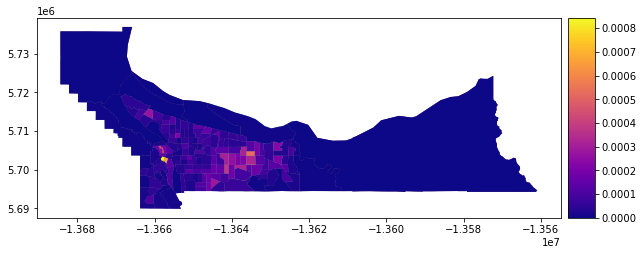

In [132]:
multn_nc['nc_pop_density'] = multn_nc[census_code] / multn_nc['geometry'].area

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

multn_nc.plot(census_code, ax=ax, legend=True, cax=cax)
multn_nc.plot('nc_pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

This is a map showing the percentage of non-citizens in Multnomah County OR.